In [1]:
!pip install mlxtend

# Q1

In [2]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
one_hot_encoded = pd.get_dummies(df)

# support and confidence values
support_values = [0.01, 0.03]
confidence_values = [0.5, 0.7]

for support in support_values:
    for confidence in confidence_values:
    
        frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    
        print(f"Support: {support}, Confidence: {confidence}")
        print(f"Number of Rules: {len(rules)}")
        print(rules)
        print('***************************')

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support: 0.01, Confidence: 0.5
Number of Rules: 3272
                         antecedents  \
0                         (YouthBks)   
1                          (CookBks)   
2                         (ChildBks)   
3                         (DoItYBks)   
4                           (RefBks)   
...                              ...   
3267  (ItalAtlas, ItalArt, ChildBks)   
3268  (ItalAtlas, ItalArt, ItalCook)   
3269             (ArtBks, ItalAtlas)   
3270               (RefBks, ItalArt)   
3271            (ItalAtlas, ItalArt)   

                                           consequents  antecedent support  \
0                                           (ChildBks)              0.2475   
1                                           (ChildBks)              0.4310   
2                                            (CookBks)              0.4230   
3                                           (ChildBks)              0.2820   
4                                           (ChildBks)              0.2145  

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
one_hot_encoded = pd.get_dummies(df)

min_support = 0.04
min_length_values = [2, 3, 4] 

for min_length in min_length_values:
    frequent_itemsets = apriori(one_hot_encoded, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= min_length]
    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9,support_only=True)
    
    print(f"Association Rules with Minimum Length {min_length}:")
    print(rules)
    print("3" * 10)

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules with Minimum Length 2:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333
Association Rules with Minimum Length 3:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333
Association Rules with Minimum Length 4:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
3333333333


C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                       antecedents          consequents  antecedent support  \
0                       (YouthBks)           (ChildBks)              0.2475   
1                        (CookBks)           (ChildBks)              0.4310   
2                       (ChildBks)            (CookBks)              0.4230   
3                       (DoItYBks)           (ChildBks)              0.2820   
4                         (RefBks)           (ChildBks)              0.2145   
..                             ...                  ...                 ...   
255    (CookBks, ArtBks, DoItYBks)  (GeogBks, ChildBks)              0.1015   
256    (ArtBks, GeogBks, DoItYBks)  (CookBks, ChildBks)              0.0730   
257  (ChildBks, GeogBks, DoItYBks)    (CookBks, ArtBks)              0.1045   
258    (ArtBks, GeogBks, ChildBks)  (CookBks, DoItYBks)              0.1020   
259   (ArtBks, ChildBks, DoItYBks)   (CookBks, GeogBks)              0.0950   

     consequent support  support  confidence      l

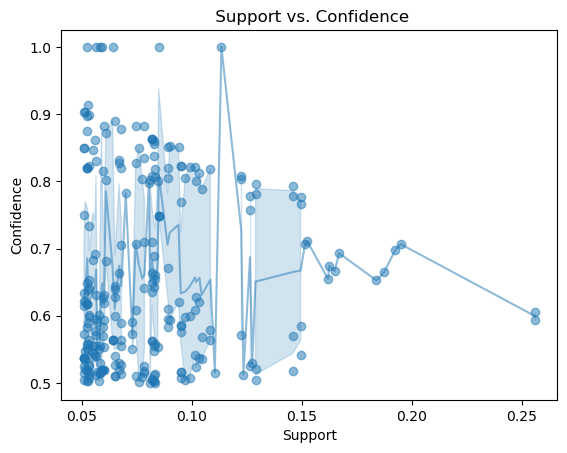

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

one_hot_encoded = pd.get_dummies(df)

frequent_itemsets = apriori(one_hot_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

# Scatter plot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title(' Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
plt.title(' Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.04, Confidence=0.4, Min_len=4:
                                  antecedents consequents  antecedent support  \
443    (CookBks, RefBks, YouthBks, DoItYBks)  (ChildBks)              0.0485   
444  (CookBks, ChildBks, YouthBks, DoItYBks)    (RefBks)              0.0820   
445    (CookBks, RefBks, YouthBks, ChildBks)  (DoItYBks)              0.0680   
446    (CookBks, RefBks, ChildBks, DoItYBks)  (YouthBks)              0.0745   
447   (ChildBks, RefBks, YouthBks, DoItYBks)   (CookBks)              0.0530   
457    (CookBks, ArtBks, YouthBks, DoItYBks)  (ChildBks)              0.0525   
458  (CookBks, ChildBks, YouthBks, DoItYBks)    (ArtBks)              0.0820   
459    (CookBks, ArtBks, YouthBks, ChildBks)  (DoItYBks)              0.0670   
460    (CookBks, ArtBks, ChildBks, DoItYBks)  (YouthBks)              0.0820   
461   (ArtBks, ChildBks, YouthBks, DoItYBks)   (CookBks)              0.0510   
470   (CookBks, GeogBks, YouthBks, DoItYBks)  (ChildBks)            

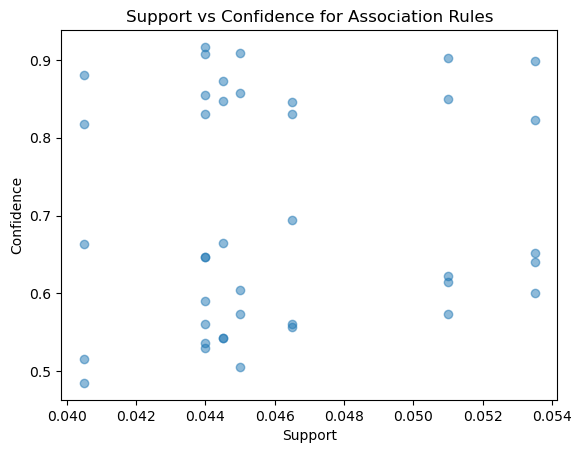

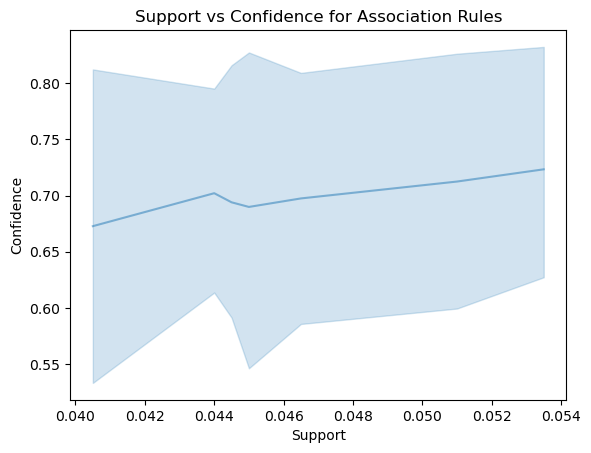

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.5, Min_len=3:
                                         antecedents           consequents  \
244                   (CookBks, YouthBks, DoItYBks)            (ChildBks)   
245                   (CookBks, ChildBks, DoItYBks)            (YouthBks)   
246                   (CookBks, YouthBks, ChildBks)            (DoItYBks)   
247                  (ChildBks, YouthBks, DoItYBks)             (CookBks)   
250                     (CookBks, RefBks, YouthBks)            (ChildBks)   
...                                             ...                   ...   
999   (GeogBks, DoItYBks, ArtBks, RefBks, ChildBks)             (CookBks)   
1000             (CookBks, GeogBks, ArtBks, RefBks)  (ChildBks, DoItYBks)   
1001            (CookBks, RefBks, ArtBks, DoItYBks)   (GeogBks, ChildBks)   
1002            (ArtBks, GeogBks, RefBks, DoItYBks)   (CookBks, ChildBks)   
1003           (ArtBks, RefBks, ChildBks, DoItYBks)    (CookBks, GeogBks)   

      antecedent suppor

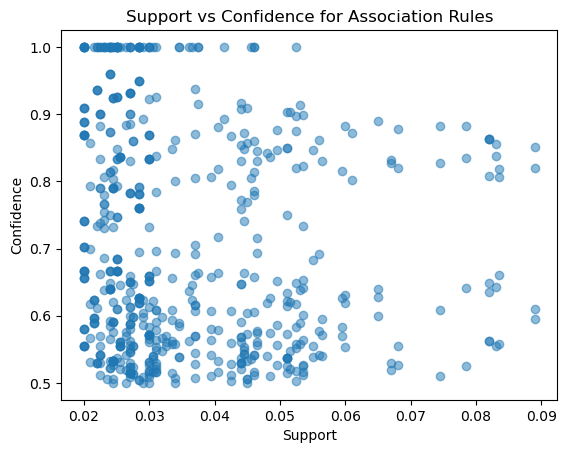

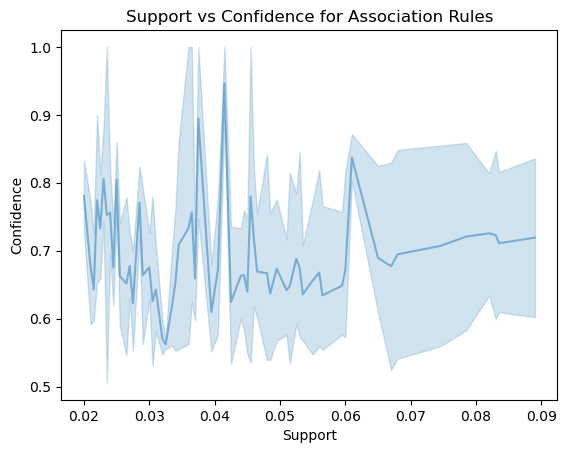

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.6, Min_len=5:
                                           antecedents consequents  \
293    (CookBks, GeogBks, YouthBks, DoItYBks, ArtBks)  (ChildBks)   
294  (CookBks, GeogBks, YouthBks, DoItYBks, ChildBks)    (ArtBks)   
295    (CookBks, GeogBks, YouthBks, ArtBks, ChildBks)  (DoItYBks)   
296   (CookBks, YouthBks, DoItYBks, ArtBks, ChildBks)   (GeogBks)   
297   (GeogBks, YouthBks, DoItYBks, ArtBks, ChildBks)   (CookBks)   

     antecedent support  consequent support  support  confidence      lift  \
293              0.0370               0.423    0.031    0.837838  1.980704   
294              0.0510               0.241    0.031    0.607843  2.522171   
295              0.0465               0.282    0.031    0.666667  2.364066   
296              0.0445               0.276    0.031    0.696629  2.524019   
297              0.0335               0.431    0.031    0.925373  2.147037   

     leverage  conviction  zhangs_metric  
293  0.015349    3.55

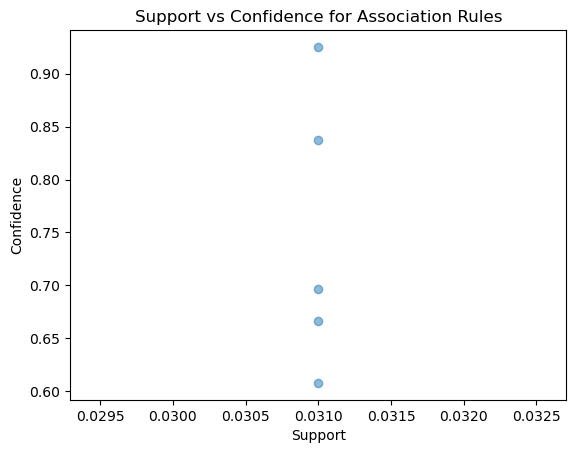

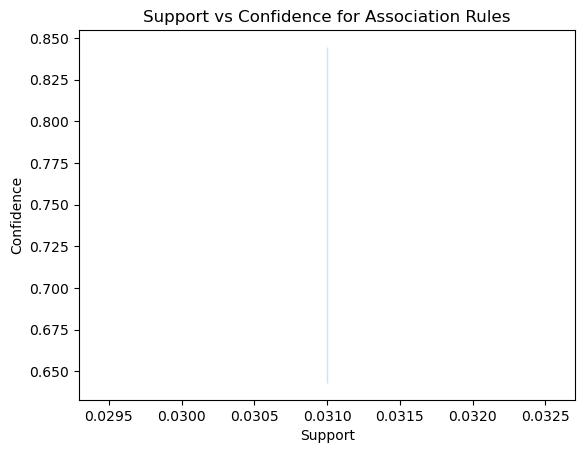

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.5, Min_len=3:
                                  antecedents                   consequents  \
183            (CookBks, YouthBks, DoItYBks)                    (ChildBks)   
184            (CookBks, ChildBks, DoItYBks)                    (YouthBks)   
185            (CookBks, YouthBks, ChildBks)                    (DoItYBks)   
186           (ChildBks, YouthBks, DoItYBks)                     (CookBks)   
189              (CookBks, RefBks, YouthBks)                    (ChildBks)   
..                                       ...                           ...   
553  (ChildBks, GeogBks, YouthBks, DoItYBks)             (CookBks, ArtBks)   
554    (ArtBks, GeogBks, YouthBks, ChildBks)           (CookBks, DoItYBks)   
555    (ArtBks, GeogBks, ChildBks, DoItYBks)           (CookBks, YouthBks)   
556   (ArtBks, ChildBks, YouthBks, DoItYBks)            (CookBks, GeogBks)   
557             (ArtBks, YouthBks, DoItYBks)  (CookBks, GeogBks, ChildBks)   

     antece

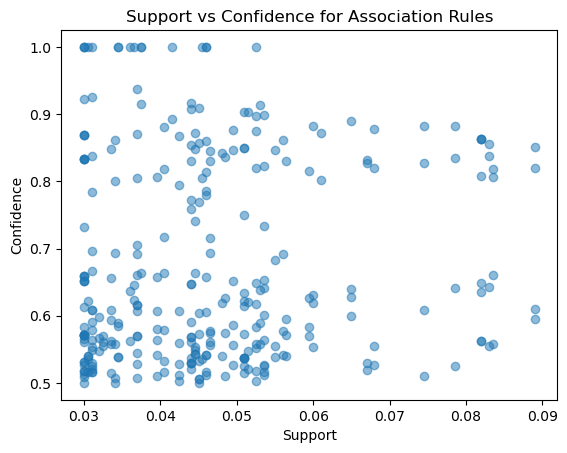

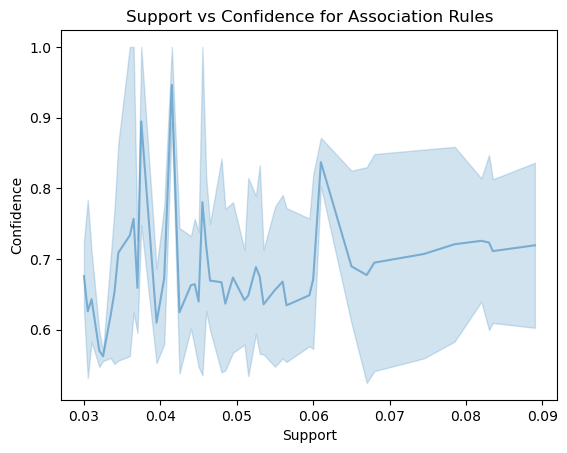

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.6, Min_len=4:
                                        antecedents          consequents  \
396          (CookBks, RefBks, YouthBks, DoItYBks)           (ChildBks)   
397          (CookBks, RefBks, YouthBks, ChildBks)           (DoItYBks)   
398         (ChildBks, RefBks, YouthBks, DoItYBks)            (CookBks)   
400          (CookBks, ArtBks, YouthBks, DoItYBks)           (ChildBks)   
401          (CookBks, ArtBks, YouthBks, ChildBks)           (DoItYBks)   
..                                             ...                  ...   
591            (ArtBks, GeogBks, RefBks, YouthBks)  (CookBks, ChildBks)   
592   (CookBks, GeogBks, DoItYBks, ArtBks, RefBks)           (ChildBks)   
593  (CookBks, DoItYBks, ArtBks, RefBks, ChildBks)            (GeogBks)   
594  (GeogBks, DoItYBks, ArtBks, RefBks, ChildBks)            (CookBks)   
595            (ArtBks, GeogBks, RefBks, DoItYBks)  (CookBks, ChildBks)   

     antecedent support  consequent support  su

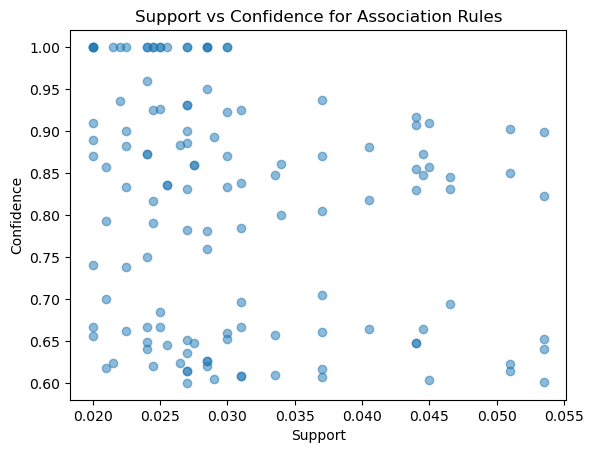

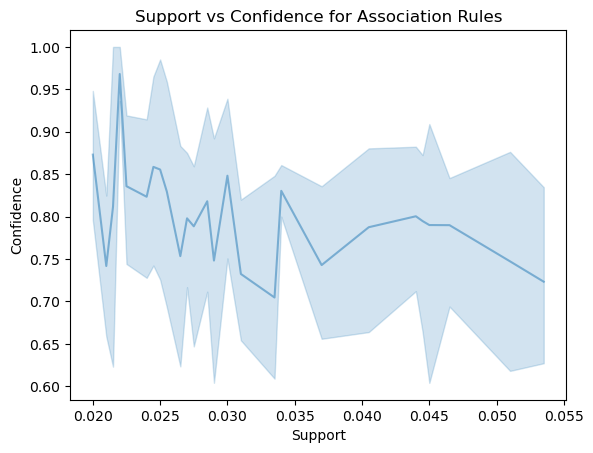

In [10]:
one_hot_encoded = pd.get_dummies(df)

def generate_and_visualize_rules(support, confidence, min_len):
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_len]

    print(f"Rules for Support={support}, Confidence={confidence}, Min_len={min_len}:\n", rules)

    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    plt.show()
    sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    plt.show()
    
# different values of support,confidence,minimum length
generate_and_visualize_rules(support=0.04, confidence=0.4, min_len=4)
generate_and_visualize_rules(support=0.02, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.03, confidence=0.6, min_len=5)

# minimum length in apriori algorithm
generate_and_visualize_rules(support=0.03, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.6, min_len=4)

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


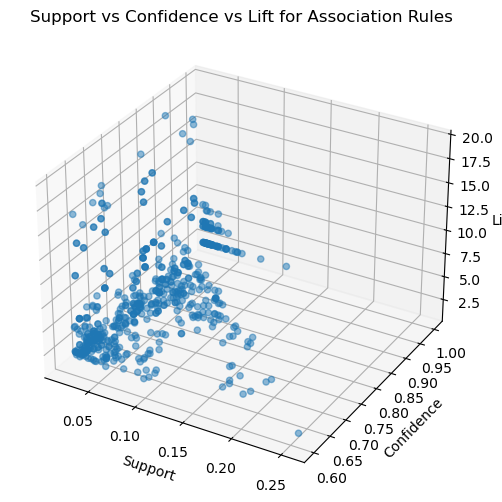

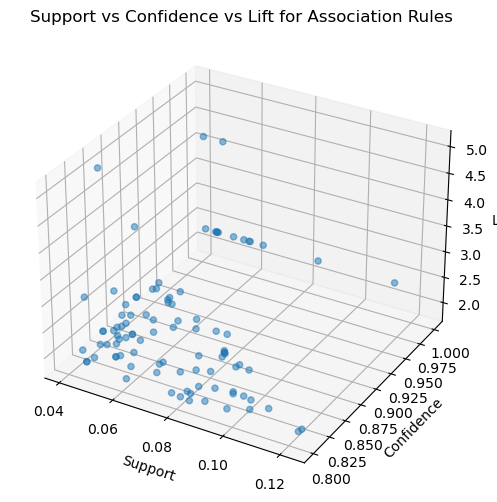

In [11]:
from mpl_toolkits.mplot3d import Axes3D
one_hot_encoded = pd.get_dummies(df)

def generate_and_visualize_rules_3d(support, confidence):
   
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rules['support'], rules['confidence'], rules['lift'], alpha=0.5)
    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')
    ax.set_title('Support vs Confidence vs Lift for Association Rules')
    
generate_and_visualize_rules_3d(support=0.02, confidence=0.6)
generate_and_visualize_rules_3d(support=0.04, confidence=0.8)

# Q2

In [12]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\my_movies.csv")
df1.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [14]:
df1.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [15]:
df1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.01, Confidence=0.4, Min_len=3:
                                   antecedents  \
1351       (Patriot, V1_Gladiator, Gladiator)   
1352     (Patriot, V1_Gladiator, Sixth Sense)   
1353        (Patriot, Gladiator, Sixth Sense)   
1354   (V1_Gladiator, Gladiator, Sixth Sense)   
1365        (Patriot, Gladiator, Sixth Sense)   
...                                       ...   
63179     (V2_LOTR1, LOTR1, V3_Harry Potter1)   
63180   (V2_LOTR1, V4_Green Mile, Green Mile)   
63181      (LOTR1, V4_Green Mile, Green Mile)   
63182        (V2_LOTR1, LOTR1, V4_Green Mile)   
63183           (V2_LOTR1, LOTR1, Green Mile)   

                                             consequents  antecedent support  \
1351                                       (Sixth Sense)                 0.6   
1352                                         (Gladiator)                 0.4   
1353                                      (V1_Gladiator)                 0.4   
1354                                   

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.5, Min_len=4:
                                              antecedents  \
5449     (Patriot, V1_Gladiator, Gladiator, Sixth Sense)   
5450    (Patriot, V1_Gladiator, Sixth Sense, V2_Patriot)   
5451       (Patriot, Gladiator, Sixth Sense, V2_Patriot)   
5452   (V1_Gladiator, Gladiator, Sixth Sense, V2_Patr...   
5453      (Patriot, V1_Gladiator, Gladiator, V2_Patriot)   
...                                                  ...   
63059  (V2_LOTR1, V3_Harry Potter1, V4_Green Mile, Gr...   
63060  (LOTR1, V3_Harry Potter1, V4_Green Mile, Green...   
63061  (V2_LOTR1, LOTR1, V3_Harry Potter1, V4_Green M...   
63062    (V2_LOTR1, LOTR1, V3_Harry Potter1, Green Mile)   
63063       (V2_LOTR1, LOTR1, V4_Green Mile, Green Mile)   

                                             consequents  antecedent support  \
5449                                        (V2_Patriot)                 0.4   
5450                                         (Gladiator)           

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.6, Min_len=5:
                                              antecedents  \
11923  (Sixth Sense, Patriot, V1_Gladiator, Gladiator...   
11924  (Sixth Sense, Patriot, V1_Gladiator, Gladiator...   
11925  (Sixth Sense, Patriot, V1_Gladiator, V2_Patrio...   
11926  (Sixth Sense, Patriot, Gladiator, V2_Patriot, ...   
11927  (Sixth Sense, V1_Gladiator, Gladiator, V2_Patr...   
...                                                  ...   
56590  (V1_Sixth Sense, V3_Harry Potter1, V4_Green Mi...   
56591  (V1_Sixth Sense, V3_Harry Potter1, V4_Green Mi...   
56592  (V1_Sixth Sense, V3_Harry Potter1, Green Mile,...   
56593  (V1_Sixth Sense, V4_Green Mile, Green Mile, V2...   
56594  (V3_Harry Potter1, V4_Green Mile, Green Mile, ...   

                                             consequents  antecedent support  \
11923                                   (V3_Sixth Sense)                 0.4   
11924                                       (V2_Patriot)           

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.03, Confidence=0.5, Min_len=3:
                                   antecedents  \
1351       (Patriot, V1_Gladiator, Gladiator)   
1352     (Patriot, V1_Gladiator, Sixth Sense)   
1353        (Patriot, Gladiator, Sixth Sense)   
1354   (V1_Gladiator, Gladiator, Sixth Sense)   
1365        (Patriot, Gladiator, Sixth Sense)   
...                                       ...   
63179     (V2_LOTR1, LOTR1, V3_Harry Potter1)   
63180   (V2_LOTR1, V4_Green Mile, Green Mile)   
63181      (LOTR1, V4_Green Mile, Green Mile)   
63182        (V2_LOTR1, LOTR1, V4_Green Mile)   
63183           (V2_LOTR1, LOTR1, Green Mile)   

                                             consequents  antecedent support  \
1351                                       (Sixth Sense)                 0.6   
1352                                         (Gladiator)                 0.4   
1353                                      (V1_Gladiator)                 0.4   
1354                                   

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Rules for Support=0.02, Confidence=0.6, Min_len=4:
                                              antecedents  \
4109     (Patriot, V1_Gladiator, Gladiator, Sixth Sense)   
4110    (Patriot, V1_Gladiator, Sixth Sense, V2_Patriot)   
4111       (Patriot, Gladiator, Sixth Sense, V2_Patriot)   
4112   (V1_Gladiator, Gladiator, Sixth Sense, V2_Patr...   
4113      (Patriot, V1_Gladiator, Gladiator, V2_Patriot)   
...                                                  ...   
56799  (V2_LOTR1, V3_Harry Potter1, V4_Green Mile, Gr...   
56800  (LOTR1, V3_Harry Potter1, V4_Green Mile, Green...   
56801  (V2_LOTR1, LOTR1, V3_Harry Potter1, V4_Green M...   
56802    (V2_LOTR1, LOTR1, V3_Harry Potter1, Green Mile)   
56803       (V2_LOTR1, LOTR1, V4_Green Mile, Green Mile)   

                                             consequents  antecedent support  \
4109                                        (V2_Patriot)                 0.4   
4110                                         (Gladiator)           

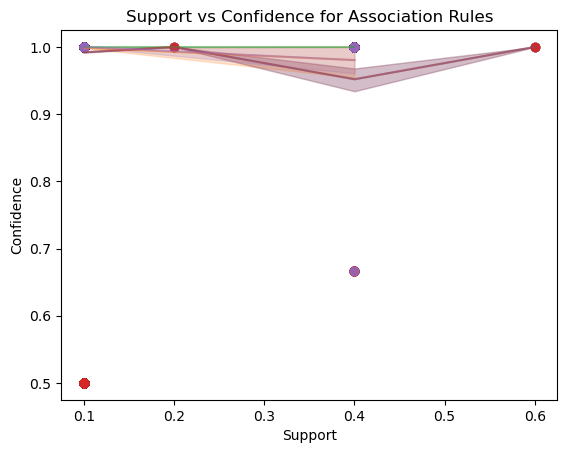

In [16]:
one_hot_encoded = pd.get_dummies(df1)

def generate_and_visualize_rules(support, confidence, min_len):
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    rules = rules[rules['antecedents'].apply(lambda x: len(x)) >= min_len]

    print(f"Rules for Support={support}, Confidence={confidence}, Min_len={min_len}:\n", rules)

    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    
    sns.lineplot(x='support', y='confidence', data=rules, alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence for Association Rules')
    
# different values of support,confidence,minimum length
generate_and_visualize_rules(support=0.01, confidence=0.4, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.5, min_len=4)
generate_and_visualize_rules(support=0.03, confidence=0.6, min_len=5)

# minimum length in apriori algorithm
generate_and_visualize_rules(support=0.03, confidence=0.5, min_len=3)
generate_and_visualize_rules(support=0.02, confidence=0.6, min_len=4)

C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


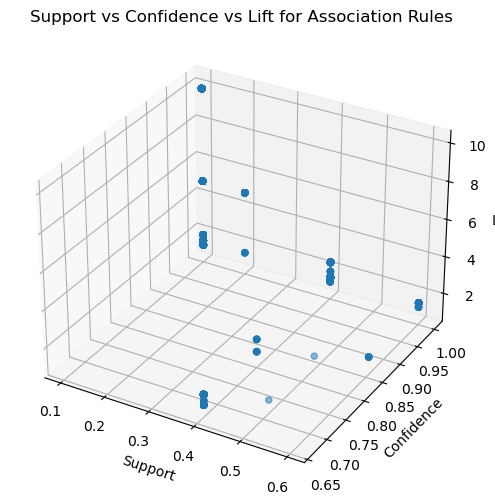

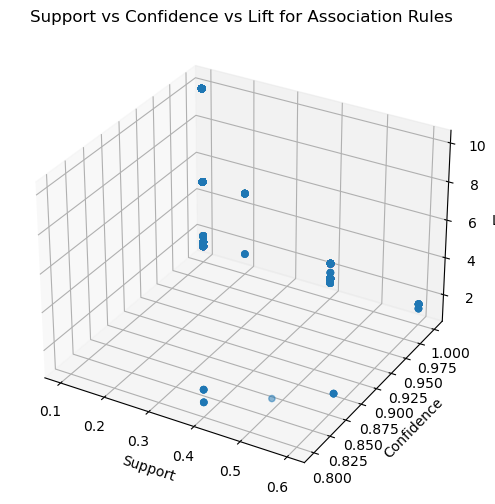

In [17]:
from mpl_toolkits.mplot3d import Axes3D
one_hot_encoded = pd.get_dummies(df1)


def generate_and_visualize_rules_3d(support, confidence):
   
    frequent_itemsets = apriori(one_hot_encoded, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    # 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(rules['support'], rules['confidence'], rules['lift'], alpha=0.5)
    ax.set_xlabel('Support')
    ax.set_ylabel('Confidence')
    ax.set_zlabel('Lift')
    ax.set_title('Support vs Confidence vs Lift for Association Rules')
    
generate_and_visualize_rules_3d(support=0.02, confidence=0.6)
generate_and_visualize_rules_3d(support=0.03, confidence=0.8)